<a href="https://colab.research.google.com/github/Darioboy/Actividad-1/blob/main/Actividad_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Actividad 1 

Dario Gollini Navarrete 

A01700608

In [66]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df = pd.read_csv('listings.csv')


In [104]:
#Extraemos únicamente nuestras columnas de interes para reducción de las columnas del df
df = df.loc[:, ['number_of_reviews','room_type', 'host_acceptance_rate', 'price','availability_365','review_scores_rating','review_scores_cleanliness', 'review_scores_communication','host_location']]
df.head()

,number_of_reviews,room_type,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication,host_location
0,0,Entire home/apt,NaN,"$4,001.00",363,NaN,NaN,NaN,"Mexico City, Mexico"
1,27,Private room,100%,$500.00,363,4.96,4.93,4.93,"Mexico City, Mexico"
2,144,Private room,67%,$599.00,323,4.73,4.70,4.91,"Mexico City, Mexico"
3,58,Entire home/apt,79%,"$18,000.00",331,4.59,4.70,4.75,"Mexico City, Mexico"
4,61,Entire home/apt,100%,$740.00,314,4.85,4.80,4.95,"Mexico City, Mexico"


**Preprocesamiento: Nulos y Outliers**

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22948 entries, 0 to 22947
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            22948 non-null  int64  
 1   room_type                    22948 non-null  object 
 2   host_acceptance_rate         20483 non-null  object 
 3   price                        22948 non-null  object 
 4   availability_365             22948 non-null  int64  
 5   review_scores_rating         18881 non-null  float64
 6   review_scores_cleanliness    18787 non-null  float64
 7   review_scores_communication  18787 non-null  float64
 8   host_location                18699 non-null  object 
dtypes: float64(3), int64(2), object(4)
memory usage: 1.6+ MB


In [106]:
#Con esto sabemos que hay cuatro posibles opciones en tipo de habitación
df['room_type'].value_counts()

Entire home/apt    14118
Private room        8316
Shared room          342
Hotel room           172
Name: room_type, dtype: int64

Se realiza el filtro del dataframe en torno a el tipo de habitación, descartando hotel room ya que posee muy pocos valores

In [107]:
#Cambiamos el tipo de dato a flotante para poder realizar ajustes de modelo posteriores
df['price'] = df['price'].str.replace("$",'')
df['price'] = df['price'].str.replace(",",'')
#df['price'] = df['price'].str.replace(".0",'')

df['host_acceptance_rate'] = df['host_acceptance_rate'].str.replace("%",'')

df =df.fillna(method="bfill") 

df['price'] = df['price'].astype(float)
df['host_acceptance_rate'] = df['host_acceptance_rate'].astype(float)


df1 = df[df['room_type']=='Private room']
df2 = df[df['room_type']=='Shared room']
df3 = df[df['room_type']=='Entire home/apt'] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Se realiza el procesamiento de cada df generado para tratar los valores nulos y outliers


In [49]:
#Reemplazamos valores nulos del dataframe con "bfill", de esta manera asigna el valor de la fila siguiente al valor nulo que se poseía 
df1 =df1.fillna(method="bfill") 
df2 =df2.fillna(method="bfill") 
df3 =df3.fillna(method="bfill") 

In [109]:
df1.head()

,number_of_reviews,room_type,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication,host_location
1,27,Private room,100.0,500.0,363,4.96,4.93,4.93,"Mexico City, Mexico"
2,144,Private room,67.0,599.0,323,4.73,4.70,4.91,"Mexico City, Mexico"
8,58,Private room,79.0,1198.0,175,4.91,4.91,4.95,"Mexico City, Mexico"
16,0,Private room,99.0,1360.0,88,4.88,4.86,4.93,"Mexico City, Mexico"
18,127,Private room,62.0,440.0,297,4.73,4.67,4.92,"Mexico City, Mexico"


In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8316 entries, 1 to 22944
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            8316 non-null   int64  
 1   room_type                    8316 non-null   object 
 2   host_acceptance_rate         8315 non-null   float64
 3   price                        8316 non-null   float64
 4   availability_365             8316 non-null   int64  
 5   review_scores_rating         8316 non-null   float64
 6   review_scores_cleanliness    8316 non-null   float64
 7   review_scores_communication  8316 non-null   float64
 8   host_location                8316 non-null   object 
dtypes: float64(5), int64(2), object(2)
memory usage: 649.7+ KB


**Analizar la correlación que existe en cada tipo de habitación respecto a las variables siguientes**

Mediante las gráficas de dispersión y las correlaciones

Private room

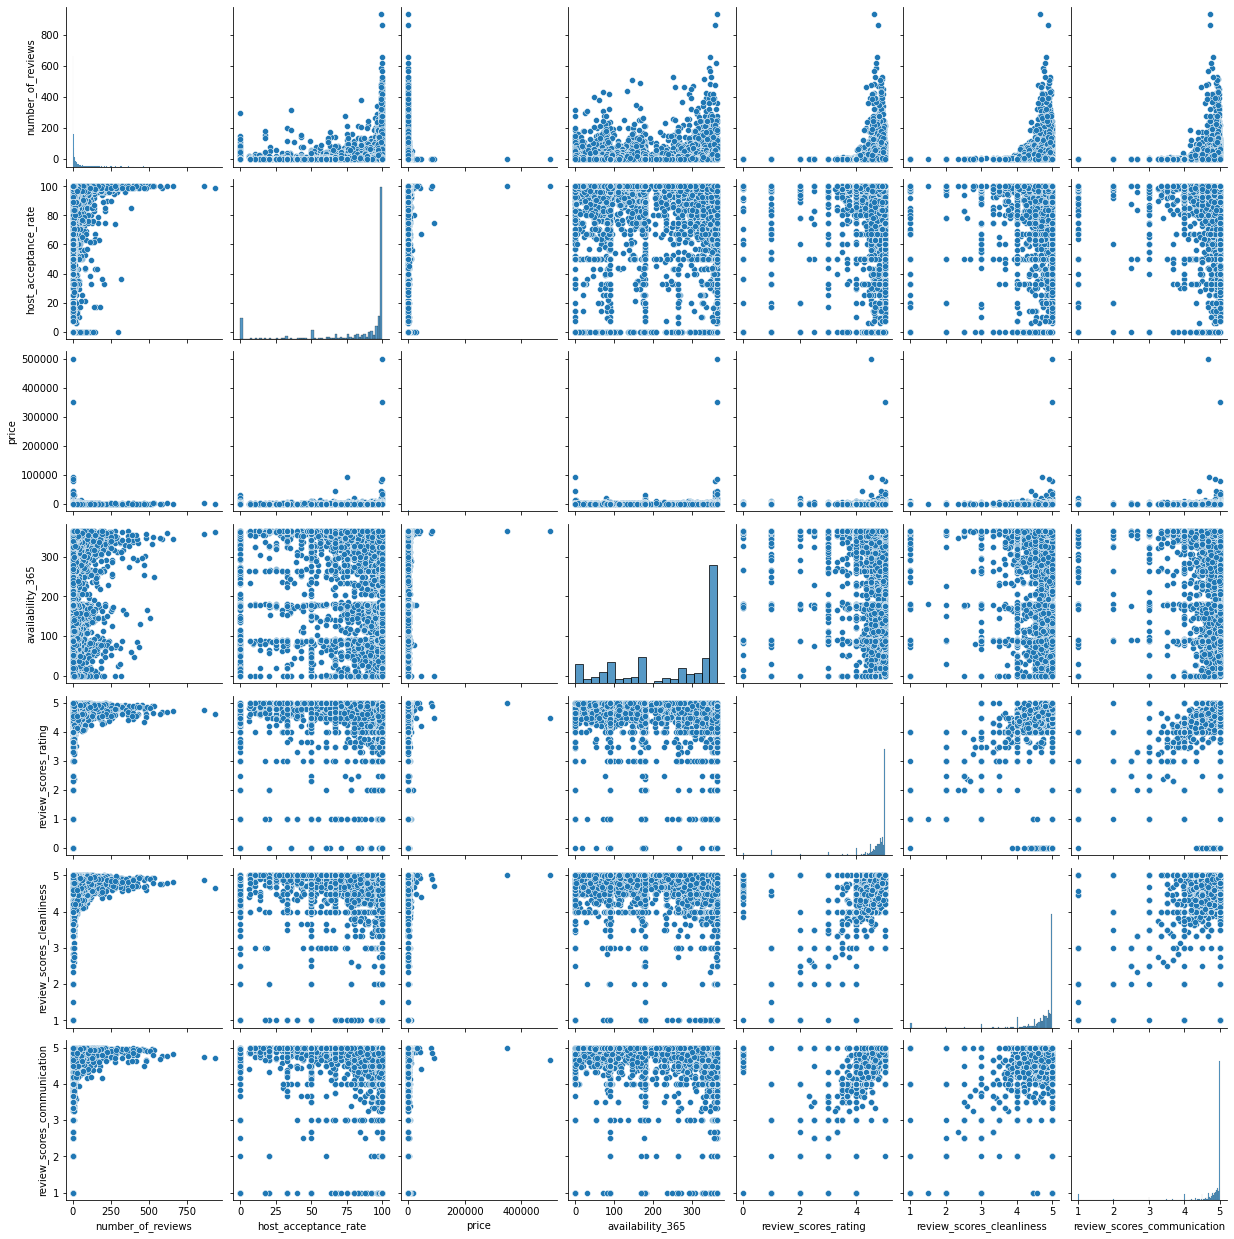

In [20]:
sns.pairplot(df1)

In [21]:
corr1 = df1.corr()
corr1 =corr1.drop(['number_of_reviews'])
corr1

,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
host_acceptance_rate,0.127733,1.000000,0.014178,0.047615,0.071101,0.039388,0.031129
price,-0.019666,0.014178,1.000000,0.027817,0.001028,0.012203,-0.000557
availability_365,-0.036625,0.047615,0.027817,1.000000,-0.065650,-0.066266,-0.065851
review_scores_rating,0.077714,0.071101,0.001028,-0.065650,1.000000,0.718186,0.727511
review_scores_cleanliness,0.073587,0.039388,0.012203,-0.066266,0.718186,1.000000,0.793839
review_scores_communication,0.069866,0.031129,-0.000557,-0.065851,0.727511,0.793839,1.000000


Shared room

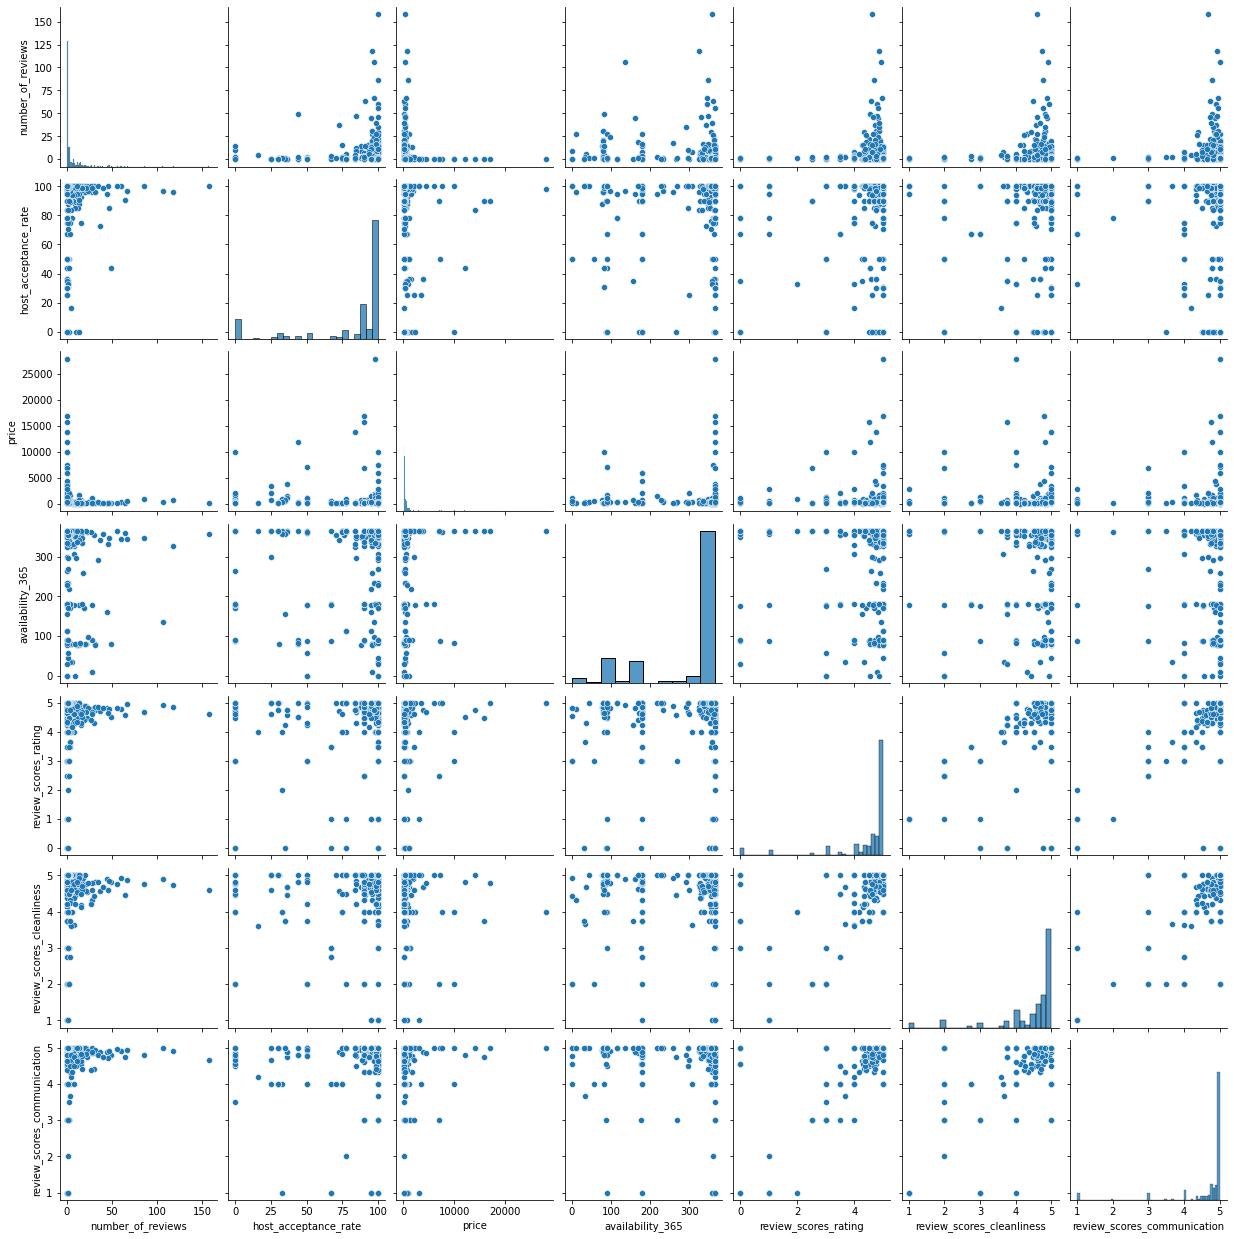

In [22]:
sns.pairplot(df2)

In [23]:
corr2 = df2.corr()
corr2 =corr2.drop(['number_of_reviews'])
corr2

,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
host_acceptance_rate,0.146618,1.000000,-0.028487,0.071992,0.111240,0.062586,-0.006665
price,-0.074527,-0.028487,1.000000,0.047409,-0.000413,-0.085004,-0.000628
availability_365,-0.046653,0.071992,0.047409,1.000000,0.020598,-0.007801,-0.059810
review_scores_rating,0.104496,0.111240,-0.000413,0.020598,1.000000,0.627422,0.654798
review_scores_cleanliness,0.092405,0.062586,-0.085004,-0.007801,0.627422,1.000000,0.737687
review_scores_communication,0.074032,-0.006665,-0.000628,-0.059810,0.654798,0.737687,1.000000


Entire home/apt

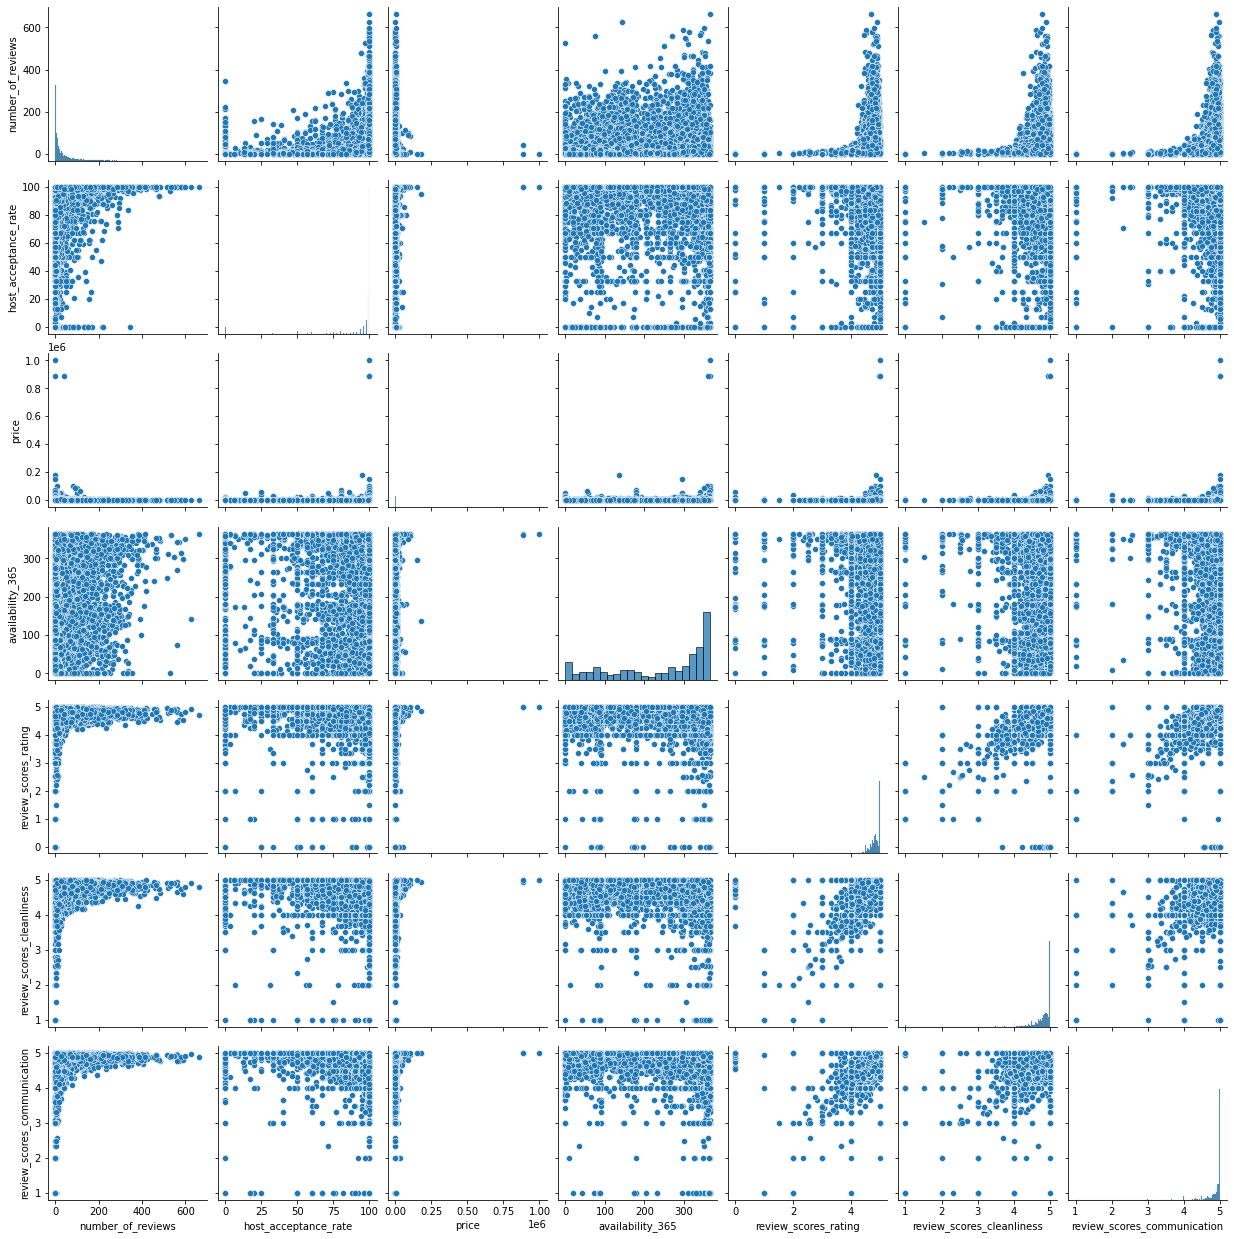

In [24]:
sns.pairplot(df3)

In [25]:
corr3 = df3.corr()
corr3 =corr3.drop(['number_of_reviews'])

corr3

,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
host_acceptance_rate,0.123154,1.000000,0.003175,0.063768,0.072948,0.059394,0.018552
price,-0.017746,0.003175,1.000000,0.021312,0.009918,0.014960,0.009329
availability_365,-0.040467,0.063768,0.021312,1.000000,-0.081055,-0.065551,-0.097800
review_scores_rating,0.076873,0.072948,0.009918,-0.081055,1.000000,0.689849,0.684635
review_scores_cleanliness,0.072620,0.059394,0.014960,-0.065551,0.689849,1.000000,0.681980
review_scores_communication,0.079595,0.018552,0.009329,-0.097800,0.684635,0.681980,1.000000


Los valores de correlación entre todas las variables y el número de reviews es bastante bajo entre todas ellas. En las gráficas de dsipersión no es muy perceptible que haya una correlación lineal simple entre ninguna, además de que el volumen de datos es demasiado, por lo que es aún menos probable que se ajusten de manera pertinente.

**Crear el modelo matemático que describa de mejor manera el número de reseñas para cada tipo de alojamiento, utilizando la variable con con mayor correlación.**


La variable con mayor correlación para el tipo de habitación privada fue host_acceptance_rate, alcanzando un valor de correlación de 0.12773311345298644, que es sumamente bajo

In [26]:
corr1['number_of_reviews'].max()

0.12773311345298644

In [27]:
df1

,number_of_reviews,room_type,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication,host_location
1,27,Private room,100.0,500.0,363,4.96,4.93,4.93,"Mexico City, Mexico"
2,144,Private room,67.0,599.0,323,4.73,4.70,4.91,"Mexico City, Mexico"
8,58,Private room,79.0,1198.0,175,4.91,4.91,4.95,"Mexico City, Mexico"
16,0,Private room,62.0,1360.0,88,4.73,4.67,4.92,"Mexico City, Mexico"
18,127,Private room,62.0,440.0,297,4.73,4.67,4.92,"Mexico City, Mexico"
...,...,...,...,...,...,...,...,...,...
22937,0,Private room,100.0,500.0,365,4.89,4.78,5.00,"Mexico City, Mexico"
22938,9,Private room,100.0,210.0,365,4.89,4.78,5.00,"Mexico City, Mexico"
22940,0,Private room,100.0,899.0,179,4.56,4.60,4.84,"Mexico City, Mexico"
22941,25,Private room,97.0,400.0,365,4.56,4.60,4.84,"Mexico City, Mexico"


In [134]:
from sklearn.linear_model import LinearRegression

var_x = np.array(df1['number_of_reviews']).reshape(-1,1)
var_y = np.array(df1['host_acceptance_rate']) # target, variable dependiente


regdf1 = LinearRegression()
regdf1.fit(var_x, var_y)

LinearRegression()

In [135]:
regdf1.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([0.03432598]),
 '_residues': 2577241.193222603,
 'rank_': 1,
 'singular_': array([4574.60583414]),
 'intercept_': 89.88648635521858}

In [136]:
coef_deterdf1 =regdf1.score(var_x,var_y)
print('El coeficiente de determinación del modelo es ',coef_deterdf1)
coef_corrdf1 = np.sqrt(coef_deterdf1)
print('El coeficiente de correlación del modelo es' , coef_corrdf1)

El coeficiente de determinación del modelo es  0.009476822991193234
El coeficiente de correlación del modelo es 0.09734897529606172


La variable con mayor correlación para el tipo de habitación compartida fue host_acceptance_rate, alcanzando un valor de correlación de 0.14661805086366902

In [137]:
corr2['number_of_reviews'].max()

0.14661805086366902

In [138]:
var_x = np.array(df2['number_of_reviews']).reshape(-1,1)
var_y = np.array(df2['host_acceptance_rate']) # target, variable dependiente


regdf2 = LinearRegression()
regdf2.fit(var_x, var_y)

LinearRegression()

In [139]:
regdf2.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([0.2313289]),
 '_residues': 299192.4941617701,
 'rank_': 1,
 'singular_': array([297.23373755]),
 'intercept_': 81.22026193629783}

In [140]:
coef_deterdf2 =regdf2.score(var_x,var_y)
print('El coeficiente de determinación del modelo es ',coef_deterdf2)
coef_corrdf2 = np.sqrt(coef_deterdf2)
print('El coeficiente de correlación del modelo es' , coef_corrdf2)

El coeficiente de determinación del modelo es  0.015555942432101233
El coeficiente de correlación del modelo es 0.12472346383941248


La variable con mayor correlación para el tipo de habitación Entire home/apt fue host_acceptance_rate , alcanzando un valor de correlación de 0.12315390111542267


In [141]:
corr3['number_of_reviews'].max()

0.12315390111542267

In [142]:
var_x = np.array(df3['number_of_reviews']).reshape(-1,1)
var_y = np.array(df3['host_acceptance_rate']) # target, variable dependiente


regdf3 = LinearRegression()
regdf3.fit(var_x, var_y)

LinearRegression()

In [143]:
regdf3.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'n_features_in_': 1,
 'coef_': array([0.0380533]),
 '_residues': 5212684.215400881,
 'rank_': 1,
 'singular_': array([7324.79703688]),
 'intercept_': 90.69388942228095}

In [144]:
coef_deterdf3 =regdf3.score(var_x,var_y)
print('El coeficiente de determinación del modelo es ',coef_deterdf3)
coef_corrdf3 = np.sqrt(coef_deterdf3)
print('El coeficiente de correlación del modelo es' , coef_corrdf3)



El coeficiente de determinación del modelo es  0.01468551729960521
El coeficiente de correlación del modelo es 0.12118381616208168


In [180]:
tabla_coef = pd.DataFrame()
room = ['Private','Shared','Entire home/apartment']
coef_determinacion = [coef_deterdf1,coef_deterdf2,coef_deterdf3]
coef_corr = [coef_corrdf1,coef_corrdf2,coef_corrdf3]
tabla_coef['Room Type'] = room
tabla_coef['Determinación'] = coef_determinacion
tabla_coef['Correlación'] = coef_corr
tabla_coef

,Room Type,Determinación,Correlación
0,Private,0.009477,0.097349
1,Shared,0.015556,0.124723
2,Entire home/apartment,0.014686,0.121184


**Implementar el mismo análisis para 2 ciudades de tu elección**


In [153]:
ny = df1[df1['host_location']=='New York, NY']
ny.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 54 to 22290
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            22 non-null     int64  
 1   room_type                    22 non-null     object 
 2   host_acceptance_rate         22 non-null     float64
 3   price                        22 non-null     float64
 4   availability_365             22 non-null     int64  
 5   review_scores_rating         22 non-null     float64
 6   review_scores_cleanliness    22 non-null     float64
 7   review_scores_communication  22 non-null     float64
 8   host_location                22 non-null     object 
dtypes: float64(5), int64(2), object(2)
memory usage: 1.7+ KB


In [152]:
gdl = df1[df1['host_location']=='Guadalajara, Mexico']
gdl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 470 to 22187
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   number_of_reviews            23 non-null     int64  
 1   room_type                    23 non-null     object 
 2   host_acceptance_rate         23 non-null     float64
 3   price                        23 non-null     float64
 4   availability_365             23 non-null     int64  
 5   review_scores_rating         23 non-null     float64
 6   review_scores_cleanliness    23 non-null     float64
 7   review_scores_communication  23 non-null     float64
 8   host_location                23 non-null     object 
dtypes: float64(5), int64(2), object(2)
memory usage: 1.8+ KB


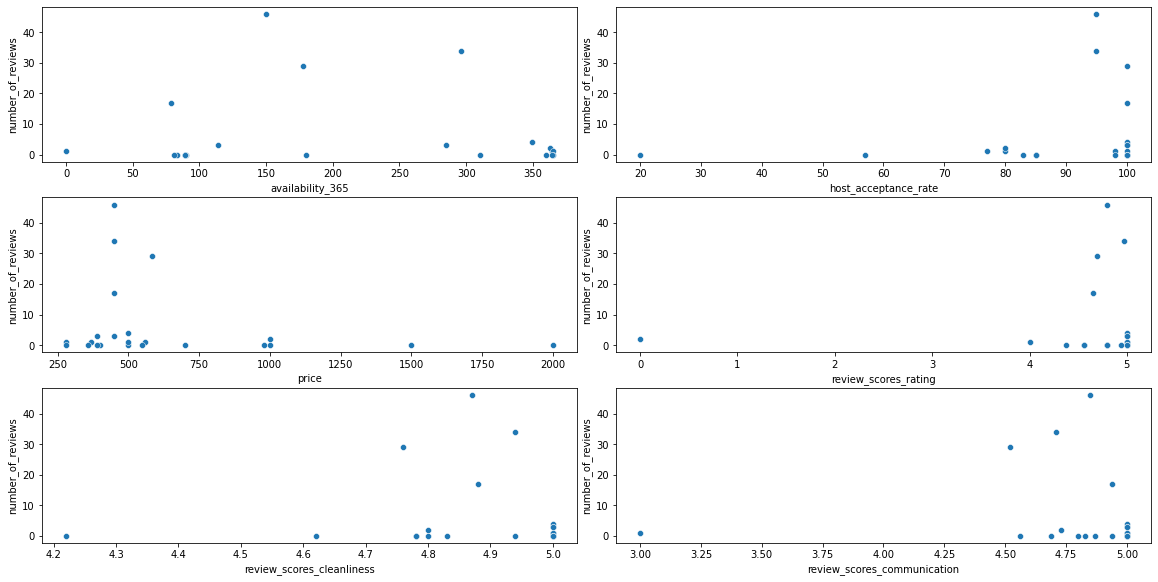

In [158]:
dependiente = gdl['number_of_reviews']

column_sels = ['availability_365','host_acceptance_rate','price','review_scores_rating','review_scores_cleanliness','review_scores_communication']

independientes = gdl.loc[:, column_sels] # var. explicativas

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(16,8))
index=0
axs=axs.flatten()
for i, k in enumerate(column_sels): # i indice, k variable
  sns.scatterplot(x=independientes[k], y=dependiente, data=gdl, ax=axs[i])
plt.tight_layout(pad=0.4)

In [162]:
corrgdl = gdl.corr()
corrgdl = corrgdl.drop(['number_of_reviews'])
corrgdl

,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
host_acceptance_rate,0.198138,1.000000,-0.216919,-0.330406,0.121872,0.178342,-0.110454
price,-0.185460,-0.216919,1.000000,-0.209866,-0.228254,-0.319417,0.017202
availability_365,-0.083094,-0.330406,-0.209866,1.000000,-0.231089,0.336519,-0.189144
review_scores_rating,0.067952,0.121872,-0.228254,-0.231089,1.000000,0.197577,0.231735
review_scores_cleanliness,-0.005067,0.178342,-0.319417,0.336519,0.197577,1.000000,-0.037189
review_scores_communication,-0.051682,-0.110454,0.017202,-0.189144,0.231735,-0.037189,1.000000


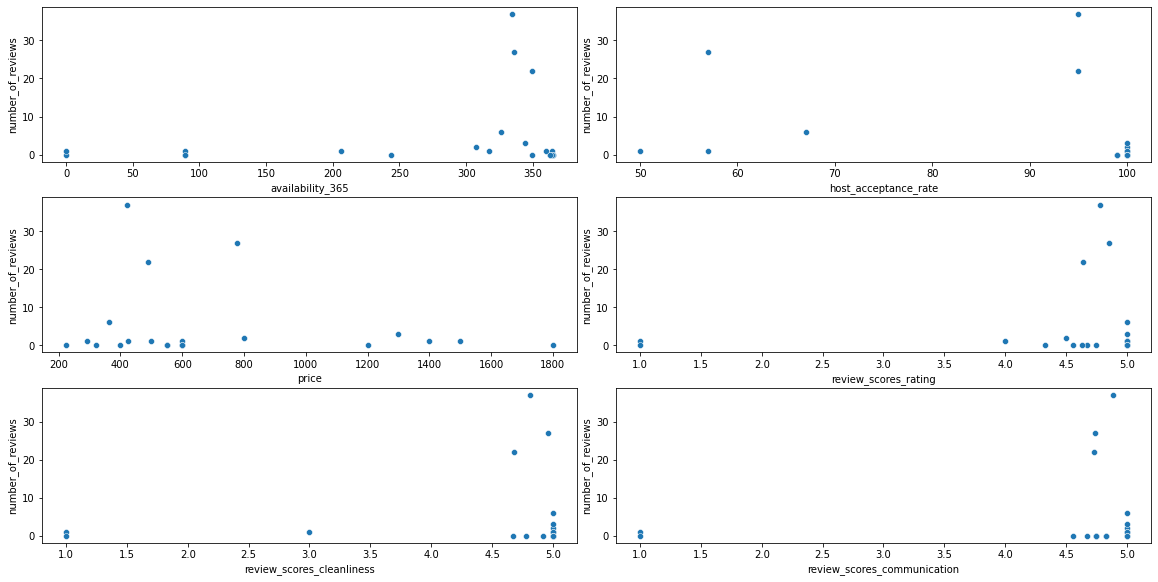

In [159]:
dependiente = ny['number_of_reviews']

column_sels = ['availability_365','host_acceptance_rate','price','review_scores_rating','review_scores_cleanliness','review_scores_communication']

independientes = ny.loc[:, column_sels] # var. explicativas

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(16,8))
index=0
axs=axs.flatten()
for i, k in enumerate(column_sels): # i indice, k variable
  sns.scatterplot(x=independientes[k], y=dependiente, data=ny, ax=axs[i])
plt.tight_layout(pad=0.4)

In [163]:
corrny = ny.corr()
corrny = corrny.drop(['number_of_reviews'])
corrny

,number_of_reviews,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication
host_acceptance_rate,-0.253379,1.000000,-0.115425,-0.050957,0.271602,0.469797,0.316311
price,-0.148222,-0.115425,1.000000,-0.591005,0.036401,-0.063623,0.125571
availability_365,0.232280,-0.050957,-0.591005,1.000000,-0.223736,-0.109844,-0.268949
review_scores_rating,0.129030,0.271602,0.036401,-0.223736,1.000000,0.900308,0.974224
review_scores_cleanliness,0.121432,0.469797,-0.063623,-0.109844,0.900308,1.000000,0.925461
review_scores_communication,0.115160,0.316311,0.125571,-0.268949,0.974224,0.925461,1.000000


Generamos un modelo de regresión lineal múltiple para estos datos

In [174]:
#Declaramos las variables dependientes e independientes para la regresión lineal
Vars_Indep= gdl[['availability_365','host_acceptance_rate','price','review_scores_rating','review_scores_cleanliness','review_scores_communication']]
Var_Dep= gdl['number_of_reviews']
modelgdl= LinearRegression()
modelgdl.fit(X=Vars_Indep, y=Var_Dep)
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
coef_gdl =modelgdl.score(Vars_Indep,Var_Dep)
print('El coeficiente de determinación del modelo es ',coef_gdl)
coef_corrgdl = np.sqrt(coef_gdl)
print('El coeficiente de correlación del modelo es' , coef_corrgdl)



El coeficiente de determinación del modelo es  0.07197565070068113
El coeficiente de correlación del modelo es 0.2682827812228752


In [175]:
Vars_Indep= ny[['availability_365','host_acceptance_rate','price','review_scores_rating','review_scores_cleanliness','review_scores_communication']]
Var_Dep= ny['number_of_reviews']
modelny= LinearRegression()
modelny.fit(X=Vars_Indep, y=Var_Dep)
#Evaluamos la eficiencia del modelo obtenido por medio del coeficiente R Determinación
coef_ny =modelny.score(Vars_Indep,Var_Dep)
print('El coeficiente de determinación del modelo es ',coef_ny)
coef_corrny = np.sqrt(coef_ny)
print('El coeficiente de correlación del modelo es' , coef_corrny)



El coeficiente de determinación del modelo es  0.202985077842333
El coeficiente de correlación del modelo es 0.45053865299476026


In [176]:
tabla_coef

,Room Type,Determinación,Corelación
0,Private,0.009477,0.097349
1,Shared,0.015556,0.124723
2,Entire home/apartment,0.014686,0.121184


In [181]:
tabla_coef = tabla_coef.append({'Room Type':'Private gdl', 'Determinación':coef_gdl, 'Correlación':coef_corrgdl}, ignore_index=True)
tabla_coef = tabla_coef.append({'Room Type':'Private ny', 'Determinación':coef_ny, 'Correlación':coef_corrny}, ignore_index=True)

tabla_coef

,Room Type,Determinación,Correlación
0,Private,0.009477,0.097349
1,Shared,0.015556,0.124723
2,Entire home/apartment,0.014686,0.121184
3,Private gdl,0.071976,0.268283
4,Private ny,0.202985,0.450539


##**Reporte comparativo sobre el comportamiento de las ciudades elegidas respecto al D.F**


Al analizar las variables mediante diagramas de dispersión y tablas de correlación, era evidente que las seis variables independientes estaban muy poco correlacionadas con varaible independiente que nos insteresaba, es decir el número de reseñas. No se percibió en ningún momento que estuvieran correlacionadas de manera lineal.

Otro factor que influenciaba era que antes de separar por respectiva ciudad, el volumen de datos era elevado, lo que nos generaba mayor variabilidad en todos los valores, esto se ve claramente en los diagramas de dispersión generados.

Al generar regresiones lineales simples, los modelos fueron muy malos como predictores, alcanzaban valores sumamente bajos tanto para correlación y determinación. 

Al acotar en ciudades, el volumen de datos era menor y se alcanzaban mejores valores de correlación, sin embargo seguían siendo muy bajos.

Al aplicar un modelo de regresión lineal múltiple considerando todas las variables independientes para las ciudad de NY y Guadalajara, fue que se obtuvieron los mejores valores determinación y correlación.

Esto es claramente perceptible en la  tabla de coeficientes final, a pesar de esto, dichos valores son muy bajos y no podrían ser utilizados para predecir el número de reviews que se reciben. El conjunto de datos con el que contamos no es propicio para predecir el número de reseñas mediante ajustes de regresión lineal simple o múltiple. Sería prudente experimentar mediante otros modelos o incluir otras variables pertenecientes al dataset total.

El mejor resultado se alcanza para la ciudad de NY cuando se toman en cuenta las seis variables independientes.

El proceso de limpieza de nulos y outliers se simplificó al métdo bfill, ya que al hacer imputaciones respecto a la media y eliminación de outliers, los coeficientes de correlación se reducían aún más. Se precisa de un mejor preprocesamiento para alcanzar a tener este dataset limpio.